In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('IPLdata.csv')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


# Dataset Description 
- AGE- age of player 1= <25, 2= 25-35 3= 35<  
- RUNS-S :-no. of runs scored by player  
- RUNS-C :- No. of runs conceded by player
- HS- highest core by batsman in ipl  
- AVE-B:- average runs scored by a batsman in ipl  
- AVE-BL - Bowling average('no. of runs conceded'/'no. of wckts taken')  
- SR-B -batting strike rate('ratio of no. of runs score to no. of balls faced') 
- SR-BL- bowiling strike rate('ratio of no. of balls bowled to no. of wckts taken')  
- SIXERS -no. of six runs scored by player in ipl  
- WKTS- no. of wickets taken by player in ipl   
- ECON-economy rate of bowler  
- CAPTAINCY-EXP- Captained t20 or national team  
-  ODI-SR-B-  Batting strike rate in one day  
- ODI-SR-BL- bowling strike rate in one-day   
- ODI-RUNS-S- runs score in one-day  
- ODI-WKTS- wickets taken in one-day  
- T-RUNS-S- runs scored in test  
- T-WKTS- wickets taken in test  
- PLAYER-SKILL- primary skill(batsman,bowler, all rounder)  
- COUNTRY- country of player  
- YEAR-A- year of auction in ipl  
- IPLTEAM- ipl team(s) for which the player has played  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [5]:
df.describe()

,Sl.NO.,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,1.300000e+02
mean,65.500000,2.092308,2166.715385,66.530769,2508.738462,71.164385,76.076923,34.033846,0.315385,514.246154,47.430769,18.719308,111.053462,17.692308,475.523077,17.169231,23.110231,6.204462,17.382615,2009.092308,1.922308e+05,5.212231e+05
std,37.671829,0.576627,3305.646757,142.676855,3582.205625,25.898440,111.205070,26.751749,0.466466,615.226335,36.403624,11.094224,35.928907,23.828146,558.314049,21.816763,20.802057,4.941531,15.273422,1.377821,1.530973e+05,4.068074e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,2.000000e+04,2.000000e+04
25%,33.250000,2.000000,25.500000,0.000000,73.250000,65.650000,0.000000,0.000000,0.000000,39.000000,16.000000,9.825000,98.237500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000e+05,2.250000e+05
50%,65.500000,2.000000,542.500000,7.000000,835.000000,78.225000,18.500000,36.600000,0.000000,172.000000,35.500000,18.635000,118.510000,6.000000,297.000000,8.500000,24.785000,7.380000,19.935000,2008.000000,2.000000e+05,4.375000e+05
75%,97.750000,2.000000,3002.250000,47.500000,3523.500000,86.790000,106.000000,45.325000,1.000000,925.250000,73.750000,27.872500,129.102500,29.750000,689.250000,23.750000,35.580000,8.247500,26.212500,2011.000000,2.250000e+05,7.000000e+05
max,130.000000,3.000000,15470.000000,800.000000,18426.000000,116.660000,534.000000,150.000000,1.000000,2254.000000,158.000000,50.110000,235.490000,129.000000,1975.000000,83.000000,126.300000,38.110000,100.200000,2011.000000,1.350000e+06,1.800000e+06


In [7]:
df.isna()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

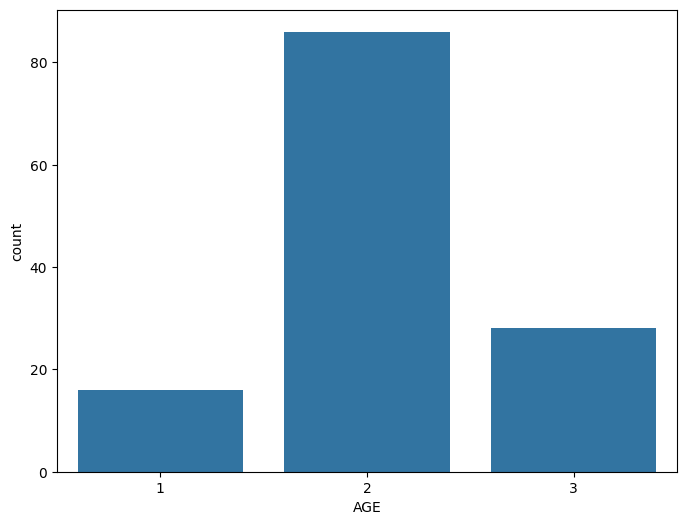

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='AGE')

#### Most no. of players are in category 2 i.e players are in age between 25-35

<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

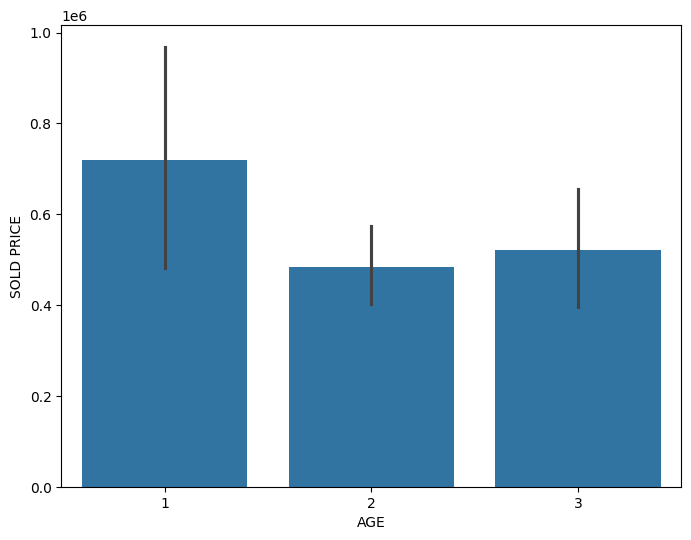

In [131]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='AGE',y='SOLD PRICE')


HIGHEST SOLD PLAYERS ARE LESS THAN 25 IN THE AGE i.e. IN CATEGORY 1

In [11]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

<Axes: xlabel='PLAYING ROLE', ylabel='count'>

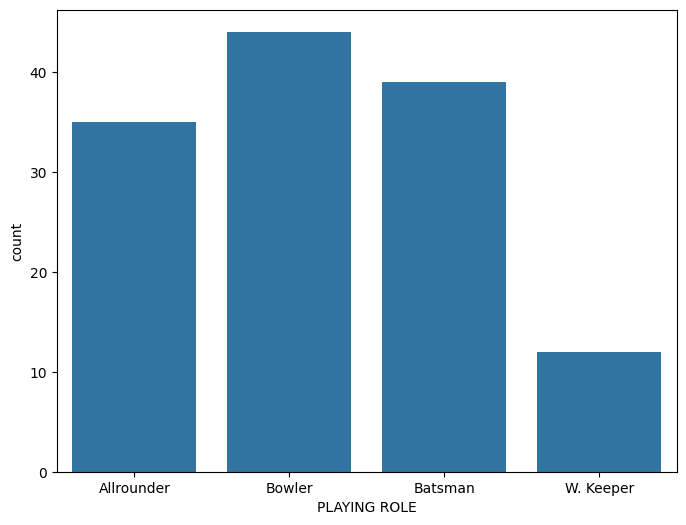

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='PLAYING ROLE')

IPL teams preferred bowlers followed by batsman and all rounder

<Axes: xlabel='COUNTRY', ylabel='count'>

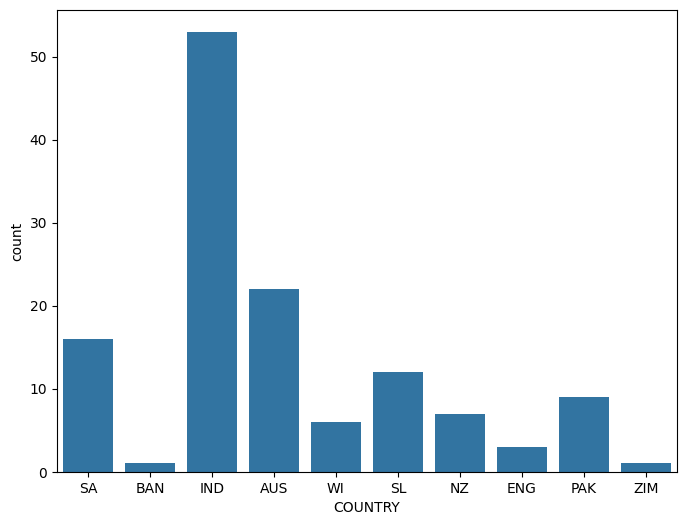

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='COUNTRY')

LEAST NO. OF PLAYERS ARE FROM BANGLADESH & ZIMBAMBE

<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

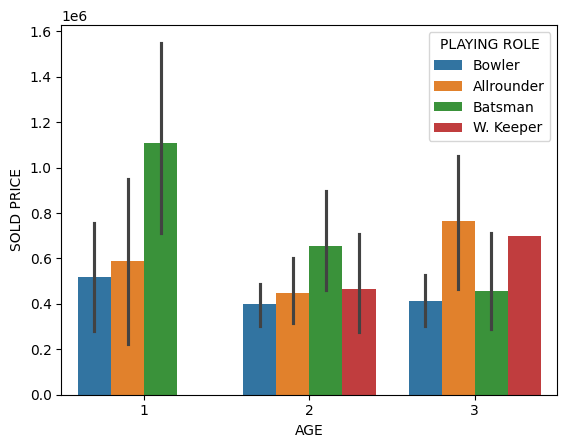

In [138]:
sns.barplot(x = 'AGE', y = 'SOLD PRICE', 
hue = 'PLAYING ROLE', data =df)

<Axes: xlabel='BASE PRICE', ylabel='RUNS-S'>

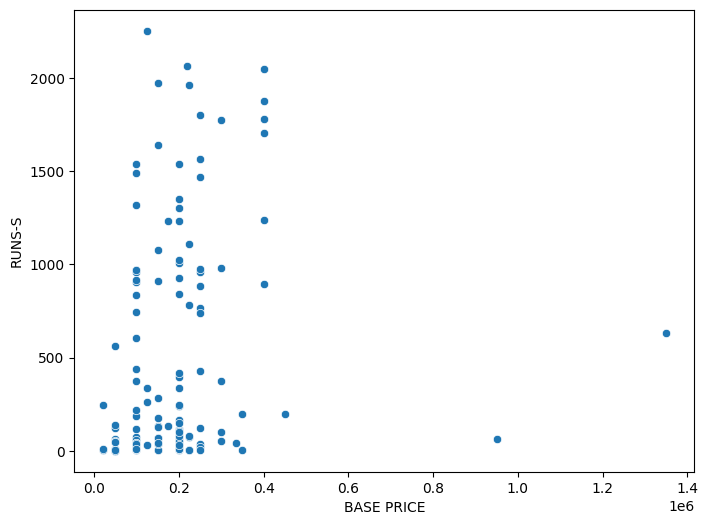

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='BASE PRICE', y='RUNS-S')

THERE IS NO RELATION BETWEEN BASE PRICE AND RUNS SCORED BY THE PLAYER

<Axes: xlabel='SOLD PRICE', ylabel='SR-BL'>

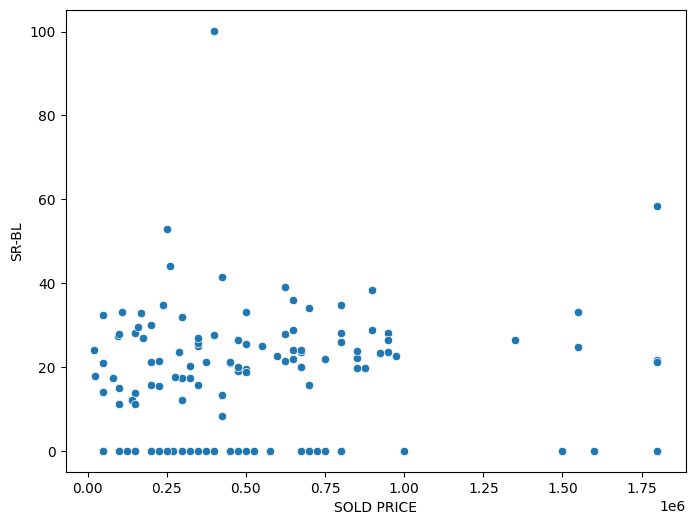

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SOLD PRICE', y='SR-BL')

THERE IS NO RELATION BETWEEN SOLD PRICE AND STRIKE RATE OF BOWLER

(array([14., 19.,  5., 18.,  6., 22., 13., 10., 16.,  7.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

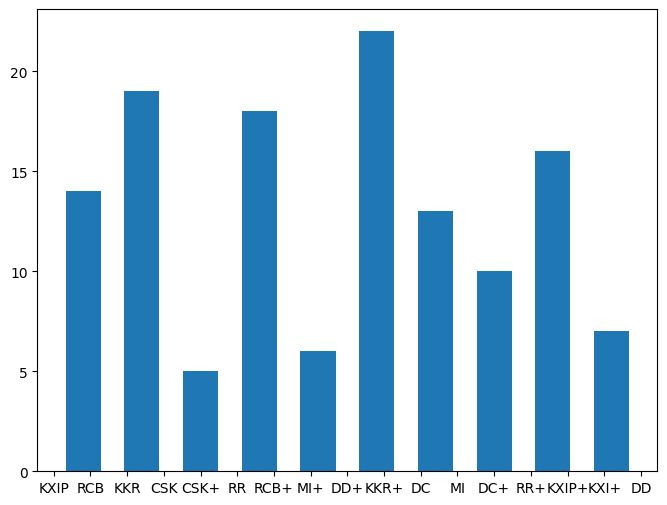

In [34]:
plt.figure(figsize=(8,6))
plt.hist(df['TEAM'], rwidth=0.60)

<Axes: xlabel='SOLD PRICE', ylabel='WKTS'>

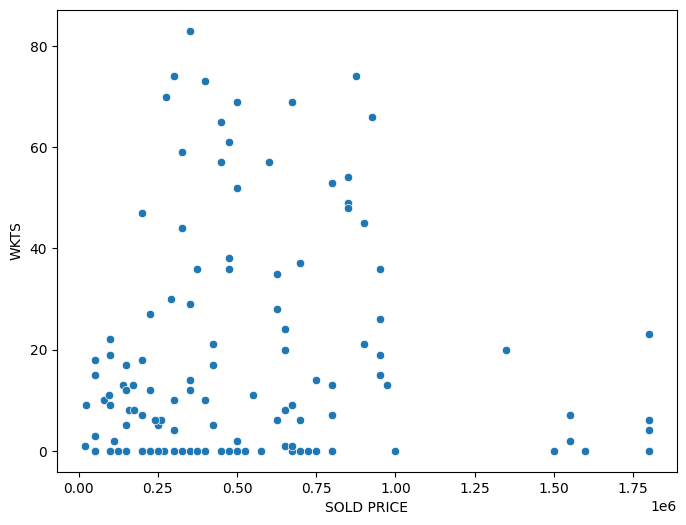

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SOLD PRICE', y='WKTS')

<Axes: xlabel='CAPTAINCY EXP', ylabel='SOLD PRICE'>

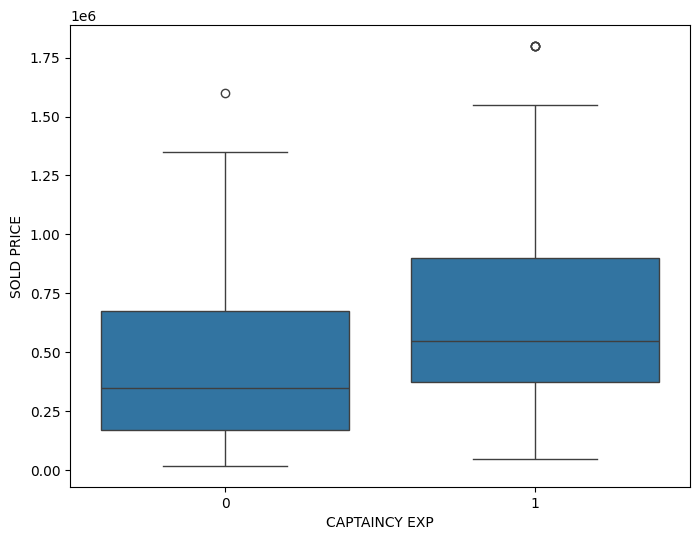

In [97]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='CAPTAINCY EXP', y='SOLD PRICE')

PLAYERS WHO HAVE CAPTAINCY EXPERIENCE GOT SOLD FOR A LITTLE HIGHER PRICE but doesn't have high impa

<Axes: xlabel='COUNTRY', ylabel='SOLD PRICE'>

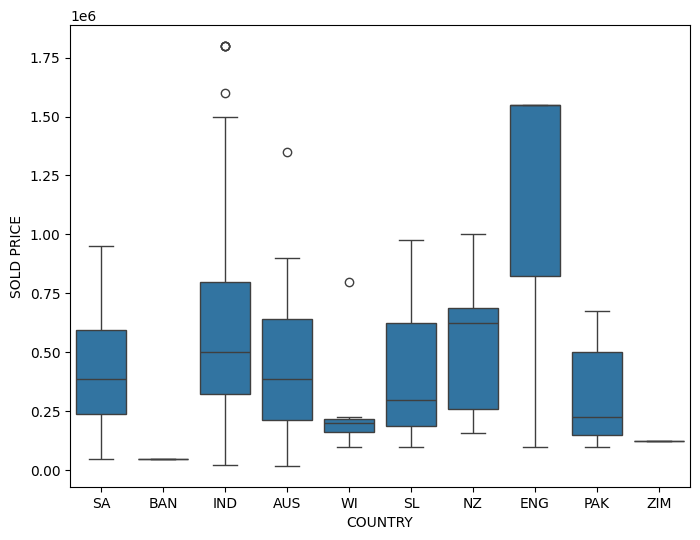

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='COUNTRY', y='SOLD PRICE')

<Axes: xlabel='TEAM', ylabel='SOLD PRICE'>

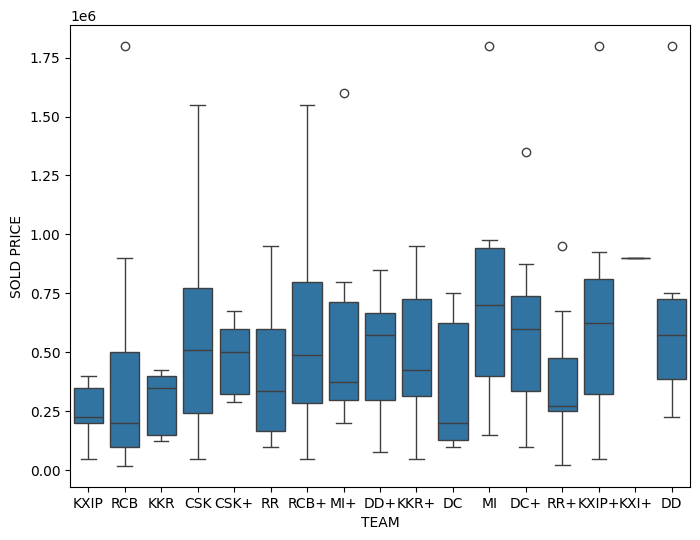

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='TEAM', y='SOLD PRICE')

<Axes: xlabel='T-RUNS', ylabel='SOLD PRICE'>

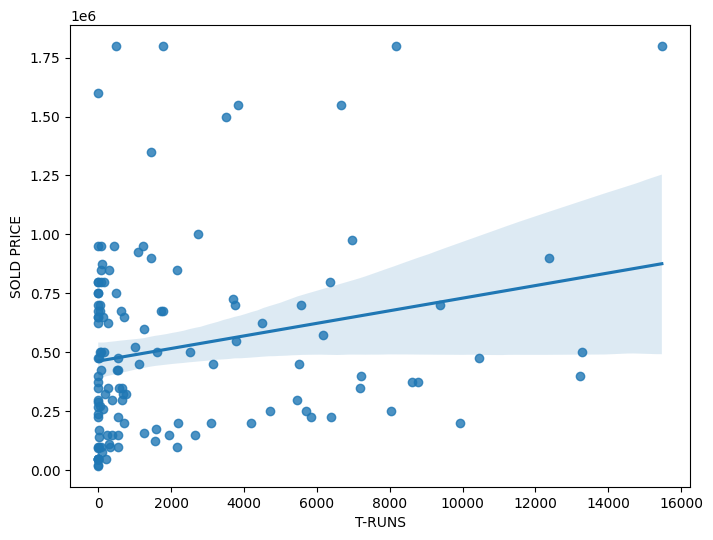

In [127]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='T-RUNS', y='SOLD PRICE')

<Axes: xlabel='T-RUNS', ylabel='SOLD PRICE'>

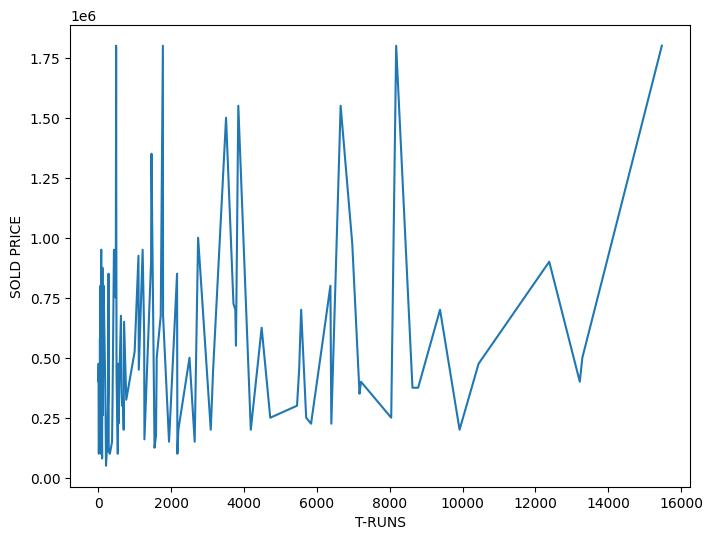

In [125]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='T-RUNS',y='SOLD PRICE')

In [66]:
df.corr(numeric_only=True)

,Sl.NO.,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
Sl.NO.,1.000000,-0.064235,-0.091722,0.121835,-0.059029,0.042439,0.098777,0.084678,-0.096388,-0.082366,-0.051490,-0.108076,0.057132,-0.024863,0.011956,0.016440,-0.040547,0.044308,-0.058574,-0.106635,0.005262,0.096150
AGE,-0.064235,1.000000,0.469402,0.293473,0.403131,0.038531,0.306949,-0.093574,0.323228,0.002776,0.083028,0.057569,-0.020303,-0.070133,-0.203835,-0.170092,-0.300514,-0.236669,-0.282870,-0.254737,0.209273,-0.106201
T-RUNS,-0.091722,0.469402,1.000000,0.026285,0.892823,0.231411,0.045505,0.067700,0.690647,0.410143,0.411209,0.374046,0.114298,0.216571,-0.253083,-0.277157,-0.298999,-0.329022,-0.309105,-0.222680,0.437984,0.216752
T-WKTS,0.121835,0.293473,0.026285,1.000000,-0.088276,0.012052,0.822940,0.060641,0.088782,-0.218544,-0.268432,-0.265540,-0.147752,-0.198036,0.297302,0.289735,0.162456,0.117530,0.205208,-0.268438,0.216648,0.035767
ODI-RUNS-S,-0.059029,0.403131,0.892823,-0.088276,1.000000,0.319264,0.056554,0.126795,0.714058,0.523955,0.495765,0.446280,0.194111,0.376012,-0.268950,-0.302745,-0.225109,-0.249795,-0.237517,-0.201213,0.388967,0.337834
ODI-SR-B,0.042439,0.038531,0.231411,0.012052,0.319264,1.000000,0.160114,0.284584,0.291373,0.306338,0.360086,0.340327,0.375371,0.320041,0.004855,-0.022502,0.018958,-0.019067,0.017522,-0.212726,0.287357,0.226880
ODI-WKTS,0.098777,0.306949,0.045505,0.822940,0.056554,0.160114,1.000000,0.124361,0.077536,-0.198101,-0.209109,-0.222062,-0.030404,-0.148722,0.327122,0.302466,0.217302,0.230221,0.259800,-0.290655,0.204650,0.112327
ODI-SR-BL,0.084678,-0.093574,0.067700,0.060641,0.126795,0.284584,0.124361,1.000000,0.103315,-0.027772,-0.067615,-0.053766,-0.051684,-0.033616,0.196887,0.151594,0.416627,0.313295,0.402495,0.009421,0.108670,0.075408
CAPTAINCY EXP,-0.096388,0.323228,0.690647,0.088782,0.714058,0.291373,0.077536,0.103315,1.000000,0.352422,0.392749,0.378271,0.176919,0.254991,-0.277903,-0.300074,-0.183775,-0.248974,-0.198688,-0.226568,0.450316,0.318835
RUNS-S,-0.082366,0.002776,0.410143,-0.218544,0.523955,0.306338,-0.198101,-0.027772,0.352422,1.000000,0.834631,0.767023,0.380022,0.866213,-0.160762,-0.220959,-0.101818,-0.179459,-0.118567,-0.008742,0.178185,0.478510


<Axes: >

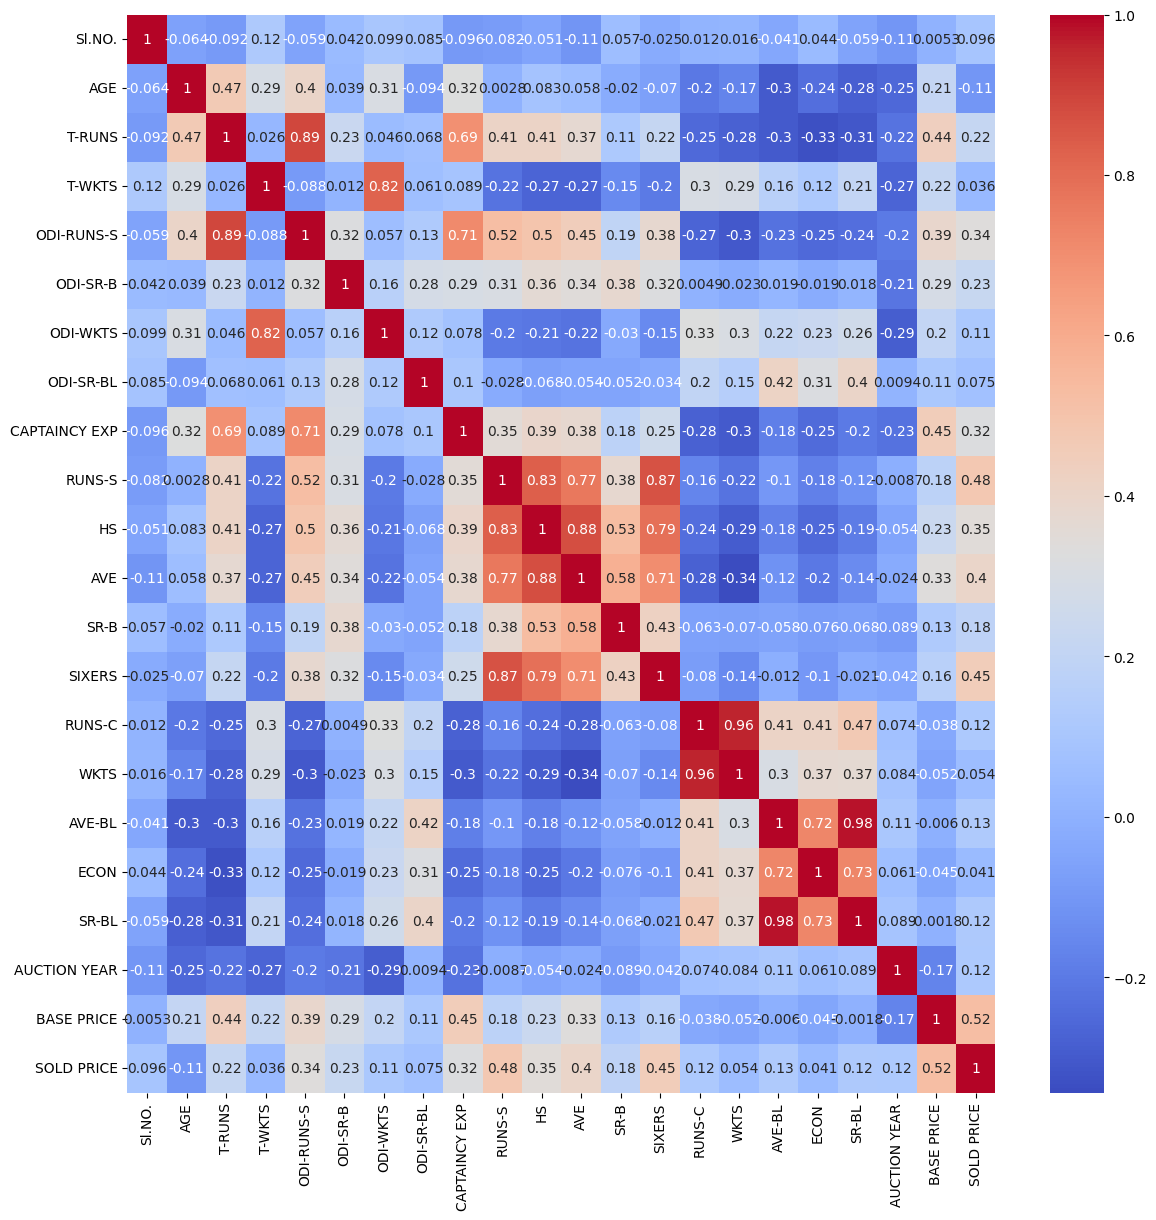

In [73]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')

In [55]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [78]:
df['COUNTRY'].value_counts()

COUNTRY
IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='AVE'>

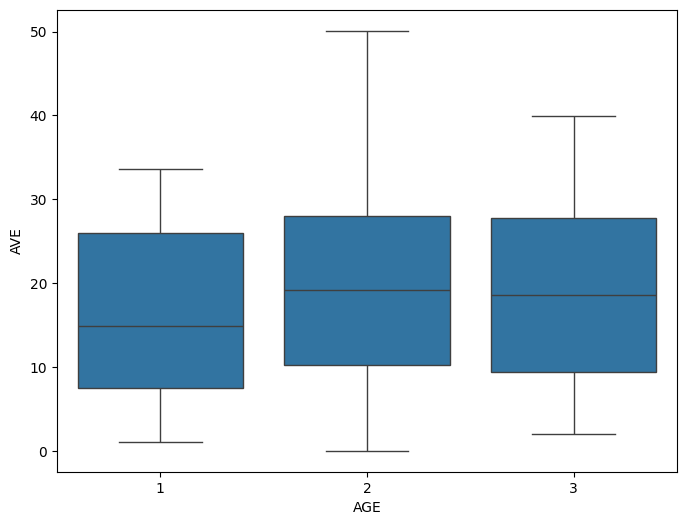

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='AGE', y='AVE')

<Axes: xlabel='AGE', ylabel='WKTS'>

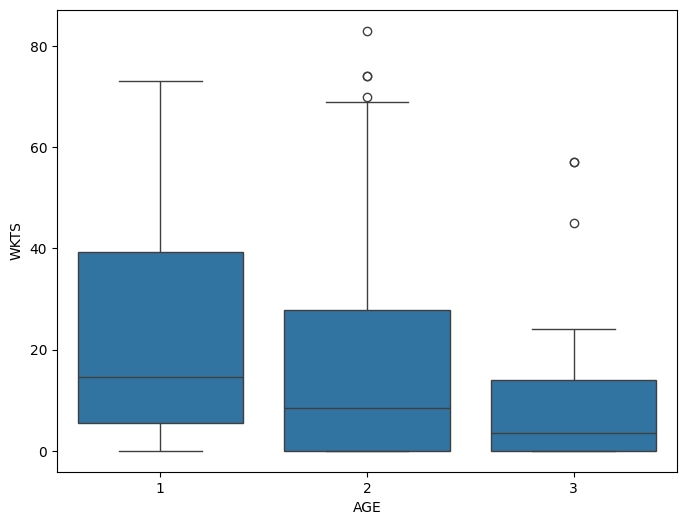

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='AGE', y='WKTS')

PLAYERS WITH AGE LESS THAN 25 TOOK MORE WICKETS THAN OTHERS

<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

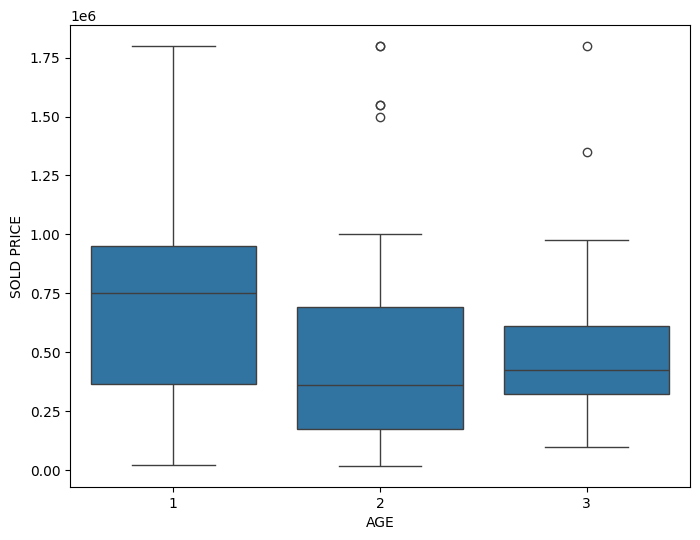

In [98]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='AGE', y='SOLD PRICE')

### Players with age less than 25 are sold in higher prices

<Axes: xlabel='SR-B', ylabel='ODI-SR-B'>

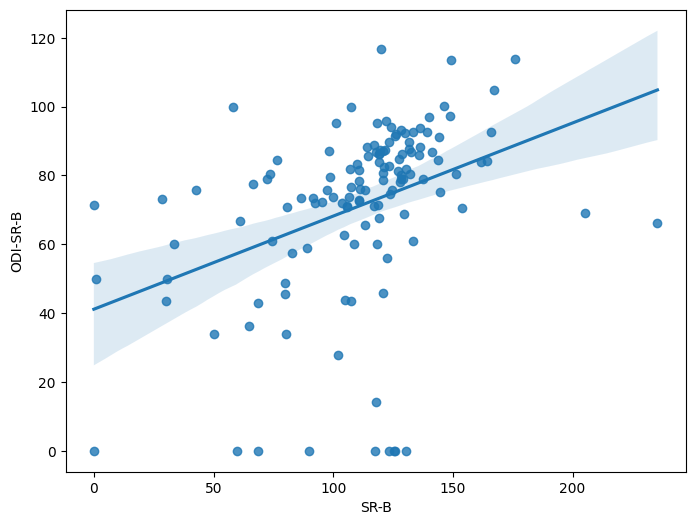

In [124]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='SR-B', y='ODI-SR-B')

<Axes: xlabel='T-RUNS', ylabel='RUNS-S'>

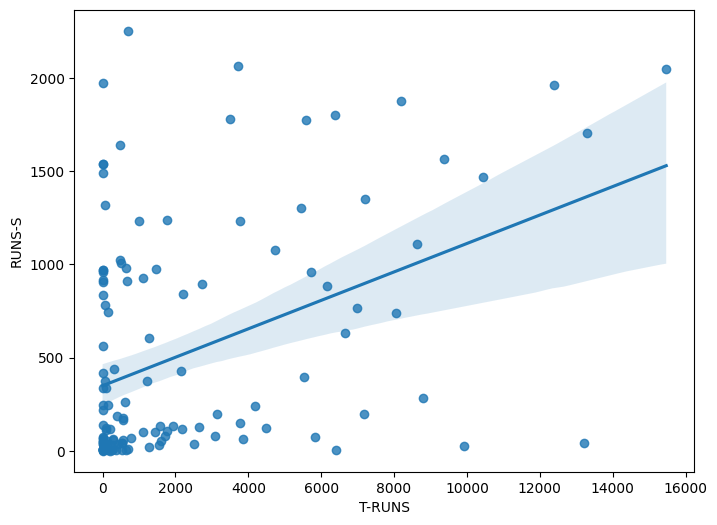

In [123]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='T-RUNS', y='RUNS-S')

Text(0.5, 1.0, 'Batting Avg vs Strike Rate')

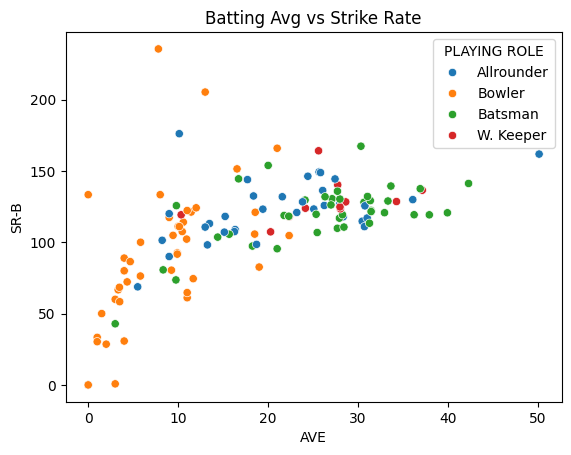

In [90]:
sns.scatterplot(data=df, x='AVE', y='SR-B', hue='PLAYING ROLE')
plt.title('Batting Avg vs Strike Rate')

Relationship between strike rate and bowler with skills


<Axes: xlabel='RUNS-S', ylabel='SR-B'>

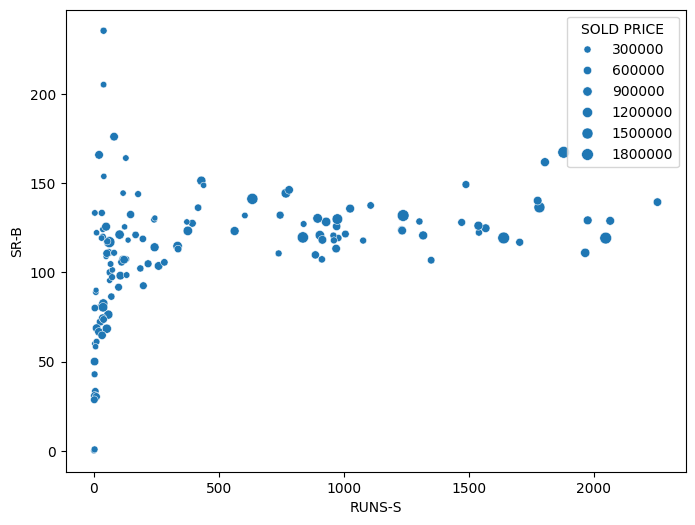

In [122]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='RUNS-S',y='SR-B',size='SOLD PRICE')

<Axes: xlabel='SOLD PRICE', ylabel='ODI-WKTS'>

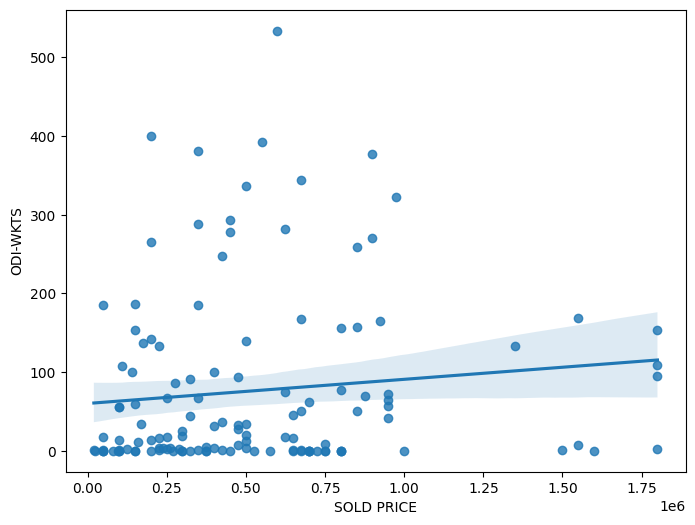

In [120]:
plt.figure(figsize=(8,6))
sns.regplot(data=df,y='ODI-WKTS',x='SOLD PRICE')

In [108]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


<Axes: xlabel='PLAYING ROLE', ylabel='SOLD PRICE'>

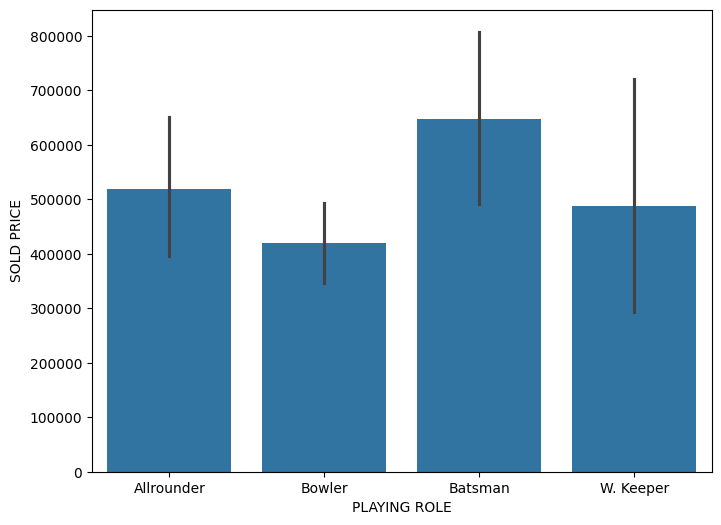

In [115]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='PLAYING ROLE', y='SOLD PRICE')

BATSMANS ARE SOLD HIGHEST THAN BOWLERS AND ALL ROUNDERS

<Axes: xlabel='PLAYING ROLE', ylabel='T-RUNS'>

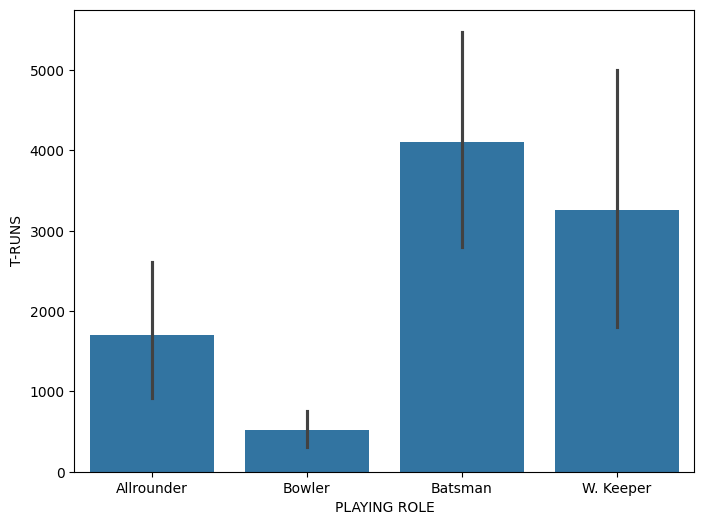

In [117]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='PLAYING ROLE', y='T-RUNS')

<Axes: xlabel='T-RUNS', ylabel='SOLD PRICE'>

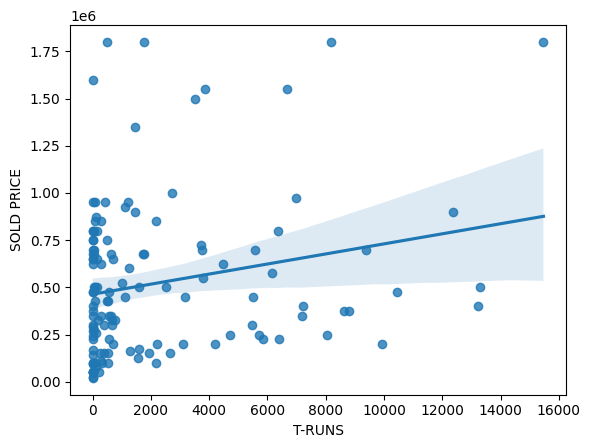

In [118]:
sns.regplot(x="T-RUNS", y="SOLD PRICE", data=df)

WE CAN SEE THAT TOTAL RUNS OF THE PLAYERS HAVE NO EFFECT ON THE SOLD PRICE AS THE LINE IS ALMOST HORIZONTAL 

<Axes: xlabel='HS', ylabel='SIXERS'>

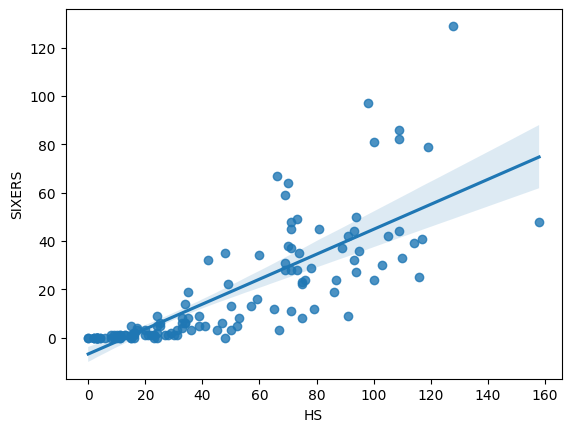

In [130]:
sns.regplot(x="HS", y="SIXERS", data=df)

WE CAN SEE THAT AS THE NO. OF SIXERS ARE INCREASING HISGHEST CORE OF THE PLAYER ALSO INCREASES

C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_20356\3400868244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SOLD PRICE'])


<Axes: xlabel='SOLD PRICE', ylabel='Density'>

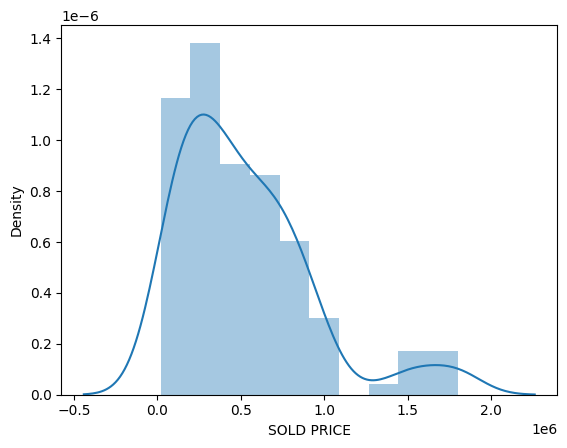

In [133]:
sns.distplot(df['SOLD PRICE'])

C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_20356\2295622631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['CAPTAINCY EXP'] == 1]['SOLD PRICE'], color='y',
C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_20356\2295622631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

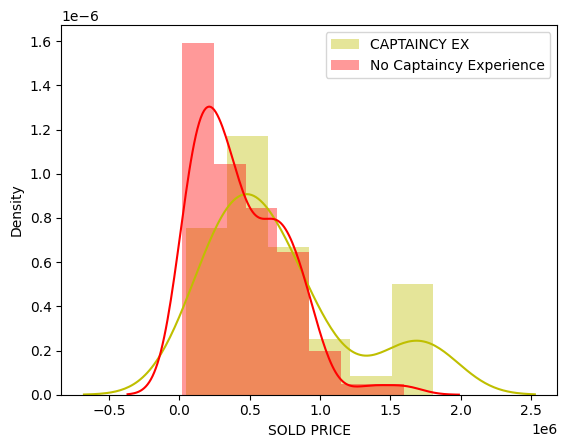

In [135]:
sns.distplot(df[df['CAPTAINCY EXP'] == 1]['SOLD PRICE'], color='y', 
label = 'CAPTAINCY EX')

sns.distplot(df[df['CAPTAINCY EXP'] == 0]['SOLD PRICE'], color='r',
label = 'No Captaincy Experience')

plt.legend();

<Axes: xlabel='PLAYING ROLE', ylabel='SOLD PRICE'>

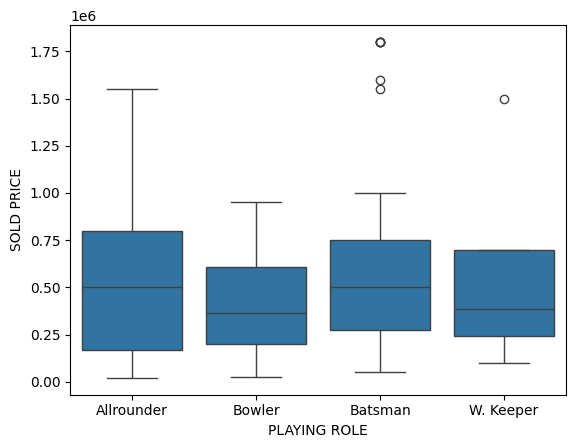

In [136]:
sns.boxplot(x = 'PLAYING ROLE', y = 'SOLD PRICE', data = df)

THE MEDIAN PRICE FOR ALLROUNDERS IS HIGHRE THAN BOWLERS AND W.KEEPERS 

C:\Users\Abhishek-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


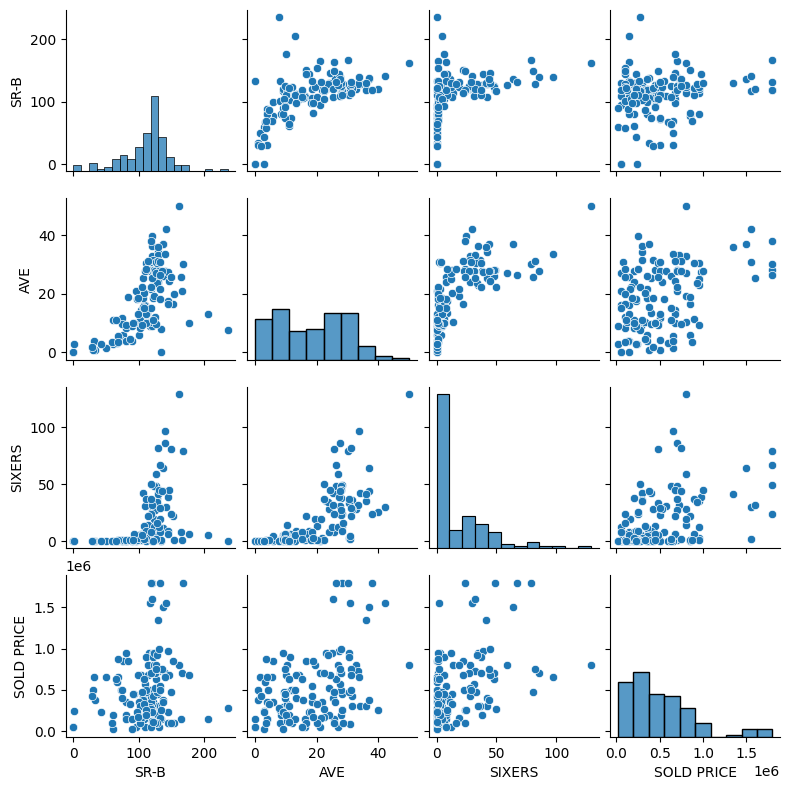

In [137]:
influential_features = ['SR-B', 'AVE', 'SIXERS', 'SOLD PRICE']

sns.pairplot(df[influential_features], size=2)